### Predicting Heart Disease Using Cholesterol and Resting Blood Pressure Measurements in Men Aged 30 to 70

#### Introduction  

The National Cancer Institute defines “heart disease” as a type of disease that affects the heart or blood vessels. With increasing exposure to unhealthy lifestyles, deteriorating environments, it has become increasingly salient to understand what factors determine or highlight increased risk of heart disease in humans. The hypothesis that high blood pressure is positively correlated with incidence of cardiovascular events (Hofman), motivated us to find a dataset that would analyze data that would allow us to predict the incidence of heart disease and its correlation with selected variables. The chosen dataset for this research endeavor is the “Heart failure prediction Dataset” that reports the health observations for 303 people across 12 variables, including age, sex, resting blood pressure, cholesterol level, and heart disease status (0 = no heart disease, 1 = heart disease) (Fedesoriano).  

This dataset will be used to answer the question: “Can cholesterol levels and resting blood pressure be used together to predict if a male aged 30-70 has heart disease?”  

In general, our exploration would help with earlier diagnosis of heart disease symptoms and cases. Moreover, this would allow for preventative measures to be taken to combat the heart disease, thus preventing and reducing overall mortality rates attributed to heart disease.  


#### Preliminary Exploratory Data Analysis

In [1]:
library(rvest)
library(tidyverse)
library(repr)
library(readxl)
library(tidymodels)
options(repr.matrix.max.rows = 10)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()         masks stats::filter()
✖ readr::guess_encoding() masks rvest::guess_encoding()
✖ dplyr::lag()            masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fi

Rows: 918 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): Sex, ChestPainType, RestingECG, ExerciseAngina, ST_Slope
dbl (7): Age, RestingBP, Cholesterol, FastingBS, MaxHR, Oldpeak, HeartDisease

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Age,num_people,average_bp,average_chol
<dbl>,<int>,<dbl>,<dbl>
31,1,-0.6615748,0.730015611
32,4,-1.0991666,0.570556191
34,3,-0.7892057,-0.551565653
35,7,-0.4193364,0.051680301
36,5,-0.5302972,-0.008813035
⋮,⋮,⋮,⋮
65,13,0.37770591,-0.1476926
66,6,0.01304602,-0.3950592
67,10,0.11515079,0.2162019


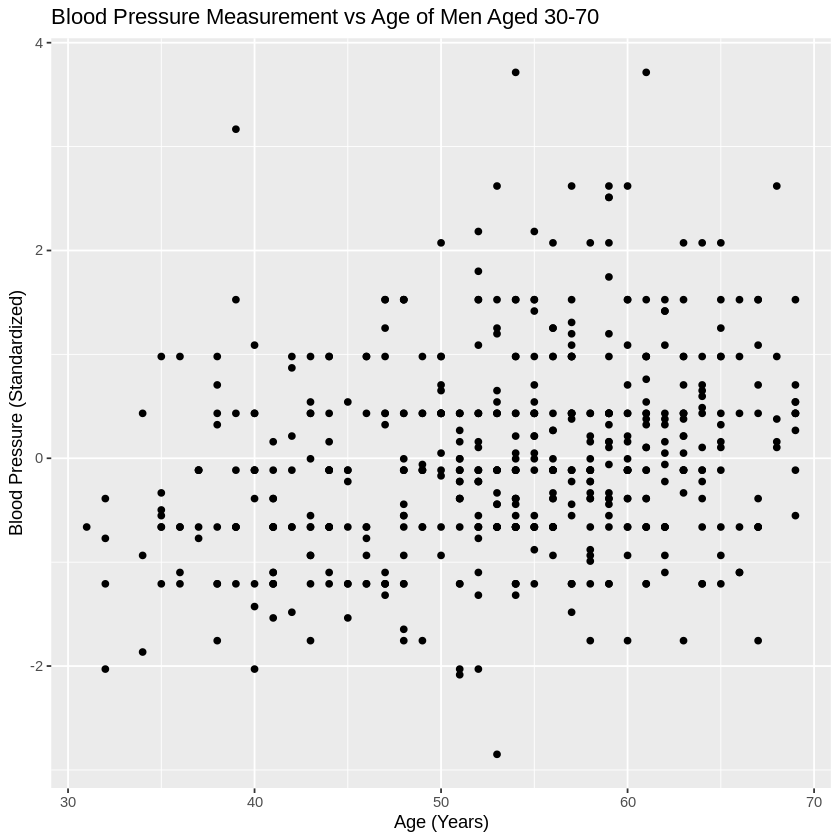

In [10]:
heart_url <- "https://raw.githubusercontent.com/flrasu/DSCI-100-002-2/main/heart.csv"

heart_data <- read_csv(heart_url) |>
    select(Age, Sex, RestingBP, Cholesterol, HeartDisease) |>
    filter(Sex == "M", Age > 30, Age < 70) |>
    mutate(HeartDisease = as.factor(HeartDisease)) |>
    arrange(Age)

scaled_heart_data <- heart_data |>
    mutate(scaled_age = scale(Age, center = TRUE), 
           scaled_bp = scale(RestingBP, center = TRUE),
           scaled_cholesterol = scale(Cholesterol, center = TRUE)) |>
    select(Age, scaled_age, scaled_bp, scaled_cholesterol, HeartDisease)

set.seed(0)
heart_split <- initial_split(scaled_heart_data, prop = 0.75, strata = HeartDisease)  
heart_train <- training(heart_split)
heart_test <- testing(heart_split)

train_table <- heart_train |>
    group_by(Age) |>
    summarize(num_people = n(),
              average_bp = mean(scaled_bp), 
              average_chol = mean(scaled_cholesterol))
train_table

viz_bp <- heart_train |>
    ggplot(aes(x = Age, y = scaled_bp)) +
        geom_point() +
        xlab("Age (Years)") +
        ylab("Blood Pressure (Standardized)") +
        ggtitle("Blood Pressure Measurement vs Age of Men Aged 30-70")
viz_bp
            

#### Methods  
To classify whether the person would suffer from a heart disease or not, we have decided to use age, resting blood pressure, and cholesterol levels as our predictors, sex and age as the filters, and heart disease as the target prediction class. We decided that age, blood pressure, and cholesterol would be the best predictors for heart disease as they are the major causes that are listed when researching the risk factors for heart disease. The other variables in the dataset are not immediately listed as major causes, so we have left them out.  

We first conducted baseline investigations to see if each individual variable had a relationship with heart disease by using visualizations to graph these correlations. A cross-validation with 20 folds was used along with tuning of classifiers to choose the best K for the model since an appropriate K is able to increase the accuracy of prediction. In a range between 10 to 150 jumping by 5 units each iteration, the best neighbor this model can find is 100 that has the highest accuracy of 69% compared to other neighbors after cross-validation and tuning classifier. Finally, we built the prediction model with the optimal K value and fit it to our training data, then used the model to predict heart disease outcomes in our test data and check our model’s accuracy. We then visualized our results by colouring the prediction data points according to the classification assigned by the model.  


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



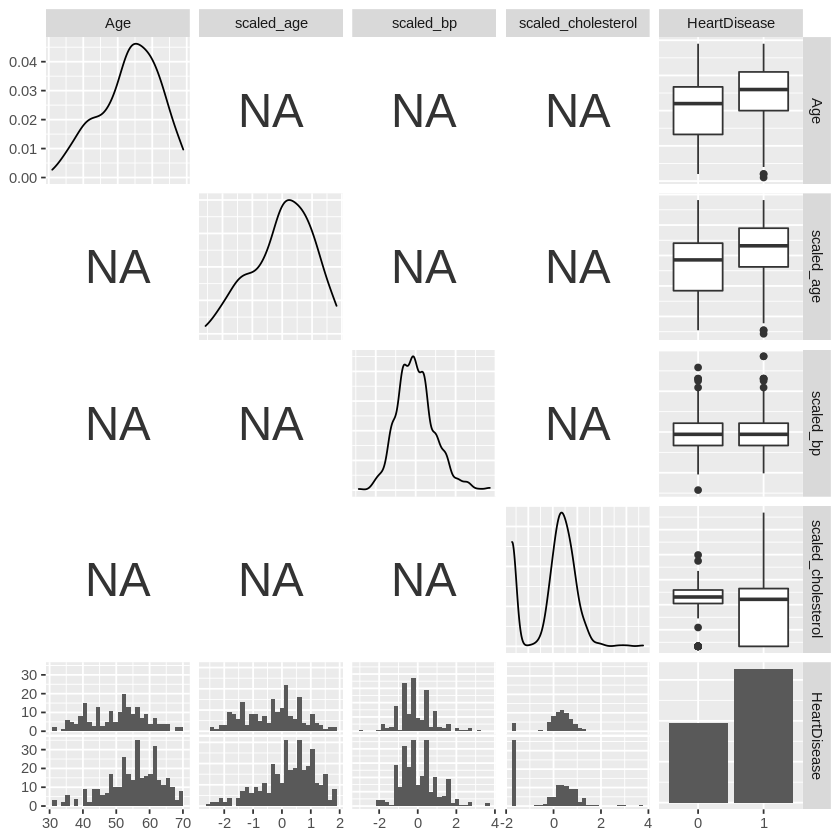

In [3]:
library(GGally)

heart_eda <- heart_train |>
            ggpairs()
heart_eda
     

In [4]:
set.seed(1234)

knn_spec <- nearest_neighbor(weight_func = 'rectangular', neighbors = tune()) |>
            set_engine('kknn') |>
            set_mode('classification')

k_vals <- tibble(neighbors = seq(from = 10, to = 150, by = 5))

heart_recipe <- recipe(HeartDisease ~ scaled_age + scaled_bp + scaled_cholesterol, data = heart_train)

heart_vfold <- vfold_cv(heart_train, v=20, strata = HeartDisease)

heart_fit <- (workflow() |>
                   add_recipe(heart_recipe) |>
                   add_model(knn_spec) |>
                   tune_grid(resamples = heart_vfold, grid = k_vals))


In [5]:
knn_results <- (heart_fit |>
                collect_metrics())
accuracies <- (knn_results |>
               filter(.metric == 'accuracy'))


accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
10,accuracy,binary,0.6835214,20,0.02197203,Preprocessor1_Model01
15,accuracy,binary,0.6850655,20,0.01685335,Preprocessor1_Model02
20,accuracy,binary,0.6982536,20,0.02090542,Preprocessor1_Model03
25,accuracy,binary,0.6870655,20,0.01948038,Preprocessor1_Model04
30,accuracy,binary,0.6950541,20,0.01640057,Preprocessor1_Model05
⋮,⋮,⋮,⋮,⋮,⋮,⋮
130,accuracy,binary,0.6796467,20,0.02016240,Preprocessor1_Model25
135,accuracy,binary,0.6739487,20,0.02107583,Preprocessor1_Model26
140,accuracy,binary,0.6758832,20,0.01932321,Preprocessor1_Model27


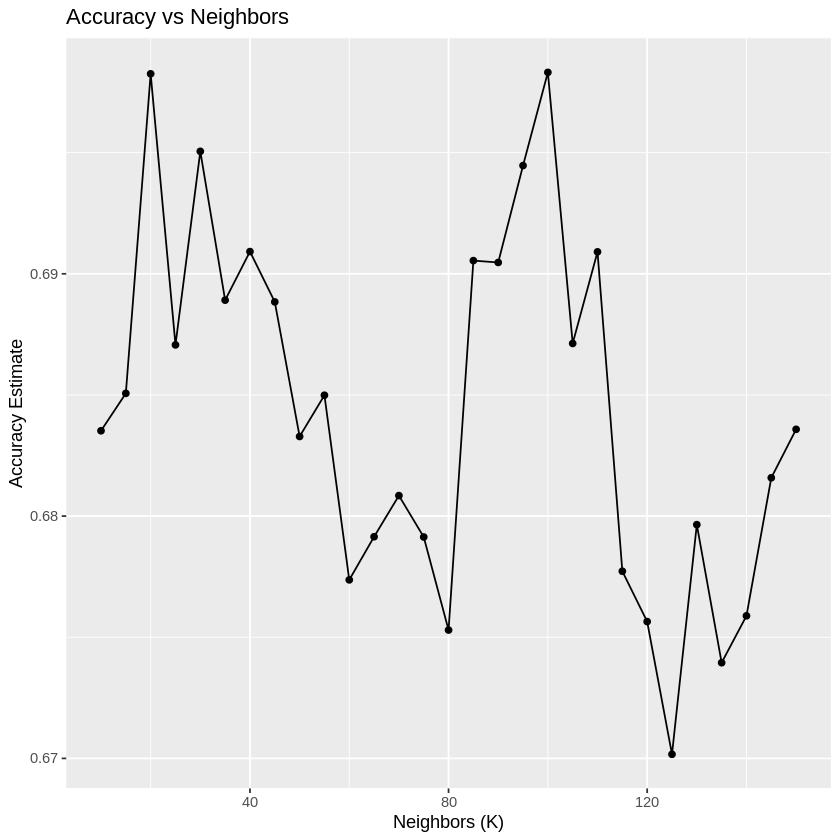

In [6]:
accuracies_vs_k <- (accuracies |>
                    ggplot(aes(x=neighbors, y=mean)) +
                    geom_point() +
                    geom_line() +
                    labs(x='Neighbors (K)', y='Accuracy Estimate') +
                    xlim(c(10,150)) +
                    ggtitle('Accuracy vs Neighbors'))

accuracies_vs_k

In [7]:
best_k <- (accuracies |>
           filter(mean == max(mean)) |>
           select(neighbors) |>
           pull())

best_k
     

[1] 100

In [8]:
best_knn_spec <- (nearest_neighbor(weight_func = 'rectangular', neighbors = best_k) |>
                  set_engine('kknn') |>
                  set_mode('classification'))

heart_best_fit <- (workflow() |>
                   add_recipe(heart_recipe) |>
                   add_model(best_knn_spec) |>
                   fit(data = heart_train))

heart_predict <- predict(heart_best_fit, heart_test) |>
                bind_cols(heart_test)

heart_predict

acc <- (heart_predict |>
        metrics(truth = HeartDisease, estimate = .pred_class))

acc


.pred_class,Age,scaled_age,scaled_bp,scaled_cholesterol,HeartDisease
<fct>,<dbl>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>",<fct>
0,33,-2.338200,-0.6615748,0.97806360,0
0,34,-2.222700,0.9793947,0.23391964,0
0,34,-2.222700,-0.7709727,-0.04956378,0
0,35,-2.107201,-0.6615748,1.06665216,0
0,36,-1.991702,-0.1145849,0.18962535,0
⋮,⋮,⋮,⋮,⋮,⋮
1,68,1.704281,0.3230069,-1.66187569,1
1,68,1.704281,-0.7709727,0.79202761,0
1,68,1.704281,0.6512008,0.04788365,1


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6971429
kap,binary,0.3324937


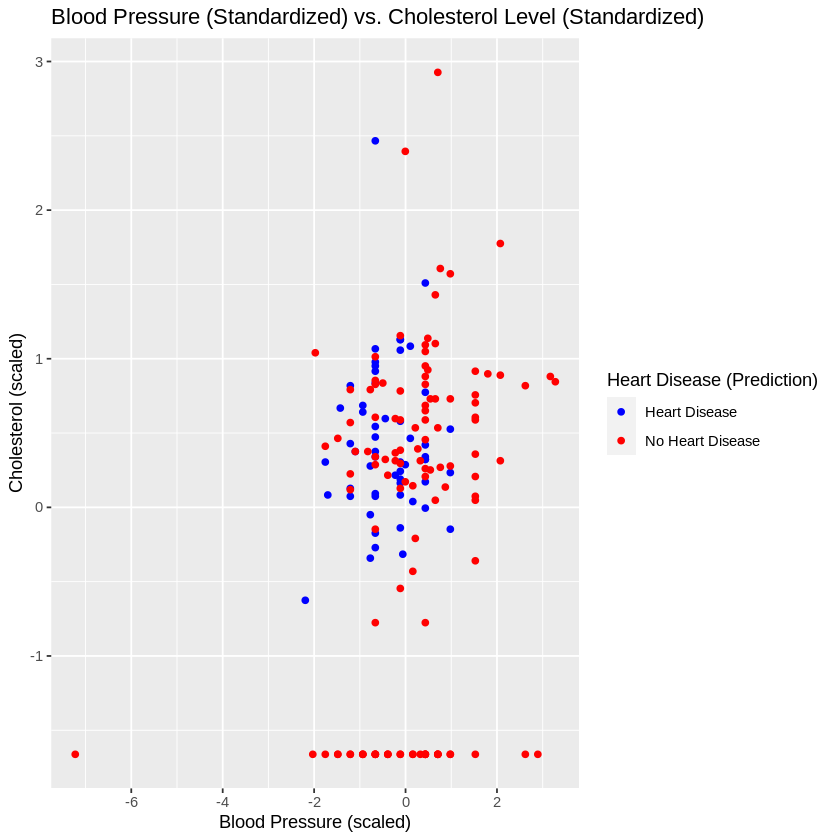

In [12]:
bp_vs_cholesterol <- (heart_predict |>
                      ggplot(aes(x=scaled_bp, y=scaled_cholesterol, color = .pred_class)) +
                      geom_point() +
                      labs(x='Blood Pressure (scaled)', y='Cholesterol (scaled)', color = 'Heart Disease (Prediction)')) +
                      ggtitle("Blood Pressure (Standardized) vs. Cholesterol Level (Standardized)") +
                      scale_color_manual(values = c("Blue", "Red"), labels = c("Heart Disease", "No Heart Disease"))

bp_vs_cholesterol


#### Discussion  

From the final plot, we can observe that points with higher blood pressure are more likely to be predicted as having heart disease (blue) as opposed to no heart disease (red). Based on previous research conducted, this stands in accordance with our initial hypothesis. However, there appears to be no relationship between cholesterol levels and the prediction of heart disease incidence. This, in contrast, disproves our initial hypothesis that both these factors affect incidence of cardiovascular disease (Hofman). This could be because of a smaller effect of cholesterol on heart disease or confounding variables. For example, it is possible that people with higher cholesterol levels also have higher blood pressure, however the factor that determines potential for heart disease risk may be high blood pressure independently. These results open up questions on the relative significance of variables known to cause heart disease on incidence of heart disease. Answering these questions would help identify which health measurements are more concerning than others regarding possible development of future heart disease. Further exploration into the correlation of variables, therefore, would help with early identification and prevention of heart diseases in the healthcare system. In the future, we could not only delve into analysing other important variables that could potentially lead to heart disease, but also the prevalence of risk when 2 variables are studied together. For example, is the risk of heart disease significant only when blood pressure is high? Or is it when both cholesterol and blood pressure are high? Questions like these would help us eliminate or refine categorically the health measurements that must be considered in the future of applied medicine.   

Our final prediction model had an accuracy of 69%, meaning that the diagnosis of heart disease cannot be solely confirmed by our model. However, the 69% accuracy metric is significantly higher than a 50% guess, meaning that the model can be used as an initial guide to filter and identify people that are likely to have heart disease.


#### References

Fedesoriano. “Heart Failure Prediction Dataset.” Kaggle, 10 Sept. 2021, https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction. 

Hofman, Alber, et al. “Does Change in Blood Pressure Predict Heart Disease?” British Medical Journal, vol. 287, 23 July 1983, pp. 267–269., https://doi.org/10.1136/bmj.287.6387.267. 

Jung, Eujene, et al. “Serum Cholesterol Levels and Risk of CARDIOVASCULAR DEATH: A Systematic Review and a Dose-Response Meta-Analysis of Prospective Cohort Studies.” International Journal of Environmental Research and Public Health, vol. 19, no. 14, 6 July 2022, https://doi.org/10.3390/ijerph19148272. 

“Traditional Risk Factors Predict Heart Disease about as Well as Sophisticated Genetic Test, Study Suggests.” UT Southwestern Medical Center, The University of Texas Southwestern Medical Center, 18 Feb. 2020, https://www.utsouthwestern.edu/newsroom/articles/year-2020/predicting-heart-disease.html. 
